In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('UML_2024.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cid                            300 non-null    int64  
 1   Molecular_weight               300 non-null    float64
 2   LogP                           300 non-null    float64
 3   Number_of_HBA_1                300 non-null    int64  
 4   Number_of_HBA_2                300 non-null    int64  
 5   Number_of_HBD_1                300 non-null    int64  
 6   Number_of_HBD_2                300 non-null    int64  
 7   Number_of_acidic_groups        300 non-null    int64  
 8   Number_of_aliphatic_OH_groups  300 non-null    int64  
 9   Number_of_basic_groups         300 non-null    int64  
 10  Fraction_of_rotatable_bonds    300 non-null    float64
 11  Number_of_heavy_bonds          300 non-null    int64  
 12  Number_of_heterocycles         300 non-null    int

In [61]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 299
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cid                            299 non-null    int64  
 1   Molecular_weight               299 non-null    float64
 2   LogP                           299 non-null    float64
 3   Number_of_HBA_1                299 non-null    int64  
 4   Number_of_HBA_2                299 non-null    int64  
 5   Number_of_HBD_1                299 non-null    int64  
 6   Number_of_HBD_2                299 non-null    int64  
 7   Number_of_acidic_groups        299 non-null    int64  
 8   Number_of_aliphatic_OH_groups  299 non-null    int64  
 9   Number_of_basic_groups         299 non-null    int64  
 10  Fraction_of_rotatable_bonds    299 non-null    float64
 11  Number_of_heavy_bonds          299 non-null    int64  
 12  Number_of_heterocycles         299 non-null    int64  


In [62]:
df.head()

,cid,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,...,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,1046,123.114998,1.0732,9,4,1,0,0,0,0,...,0,0,68.87,7.031056,1.007808,5.976582,7.111111,3.239669,63,63
1,124704,165.155998,1.5166,13,6,2,0,0,0,2,...,0,0,107.25,9.169663,1.003795,8.134998,10.083333,4.888889,85,84
2,171646,265.053997,-1.7651,11,3,1,0,1,0,0,...,0,0,59.86,7.029373,0.161433,42.543630,11.000000,4.792899,84,81
3,171647,138.149998,1.2309,11,3,1,0,0,0,0,...,0,0,59.86,7.067147,1.006808,6.019361,8.100000,3.408284,84,81
4,181450,157.559997,1.6036,8,4,1,0,0,0,0,...,0,0,68.87,7.646398,1.007958,6.586025,8.100000,3.408284,64,66


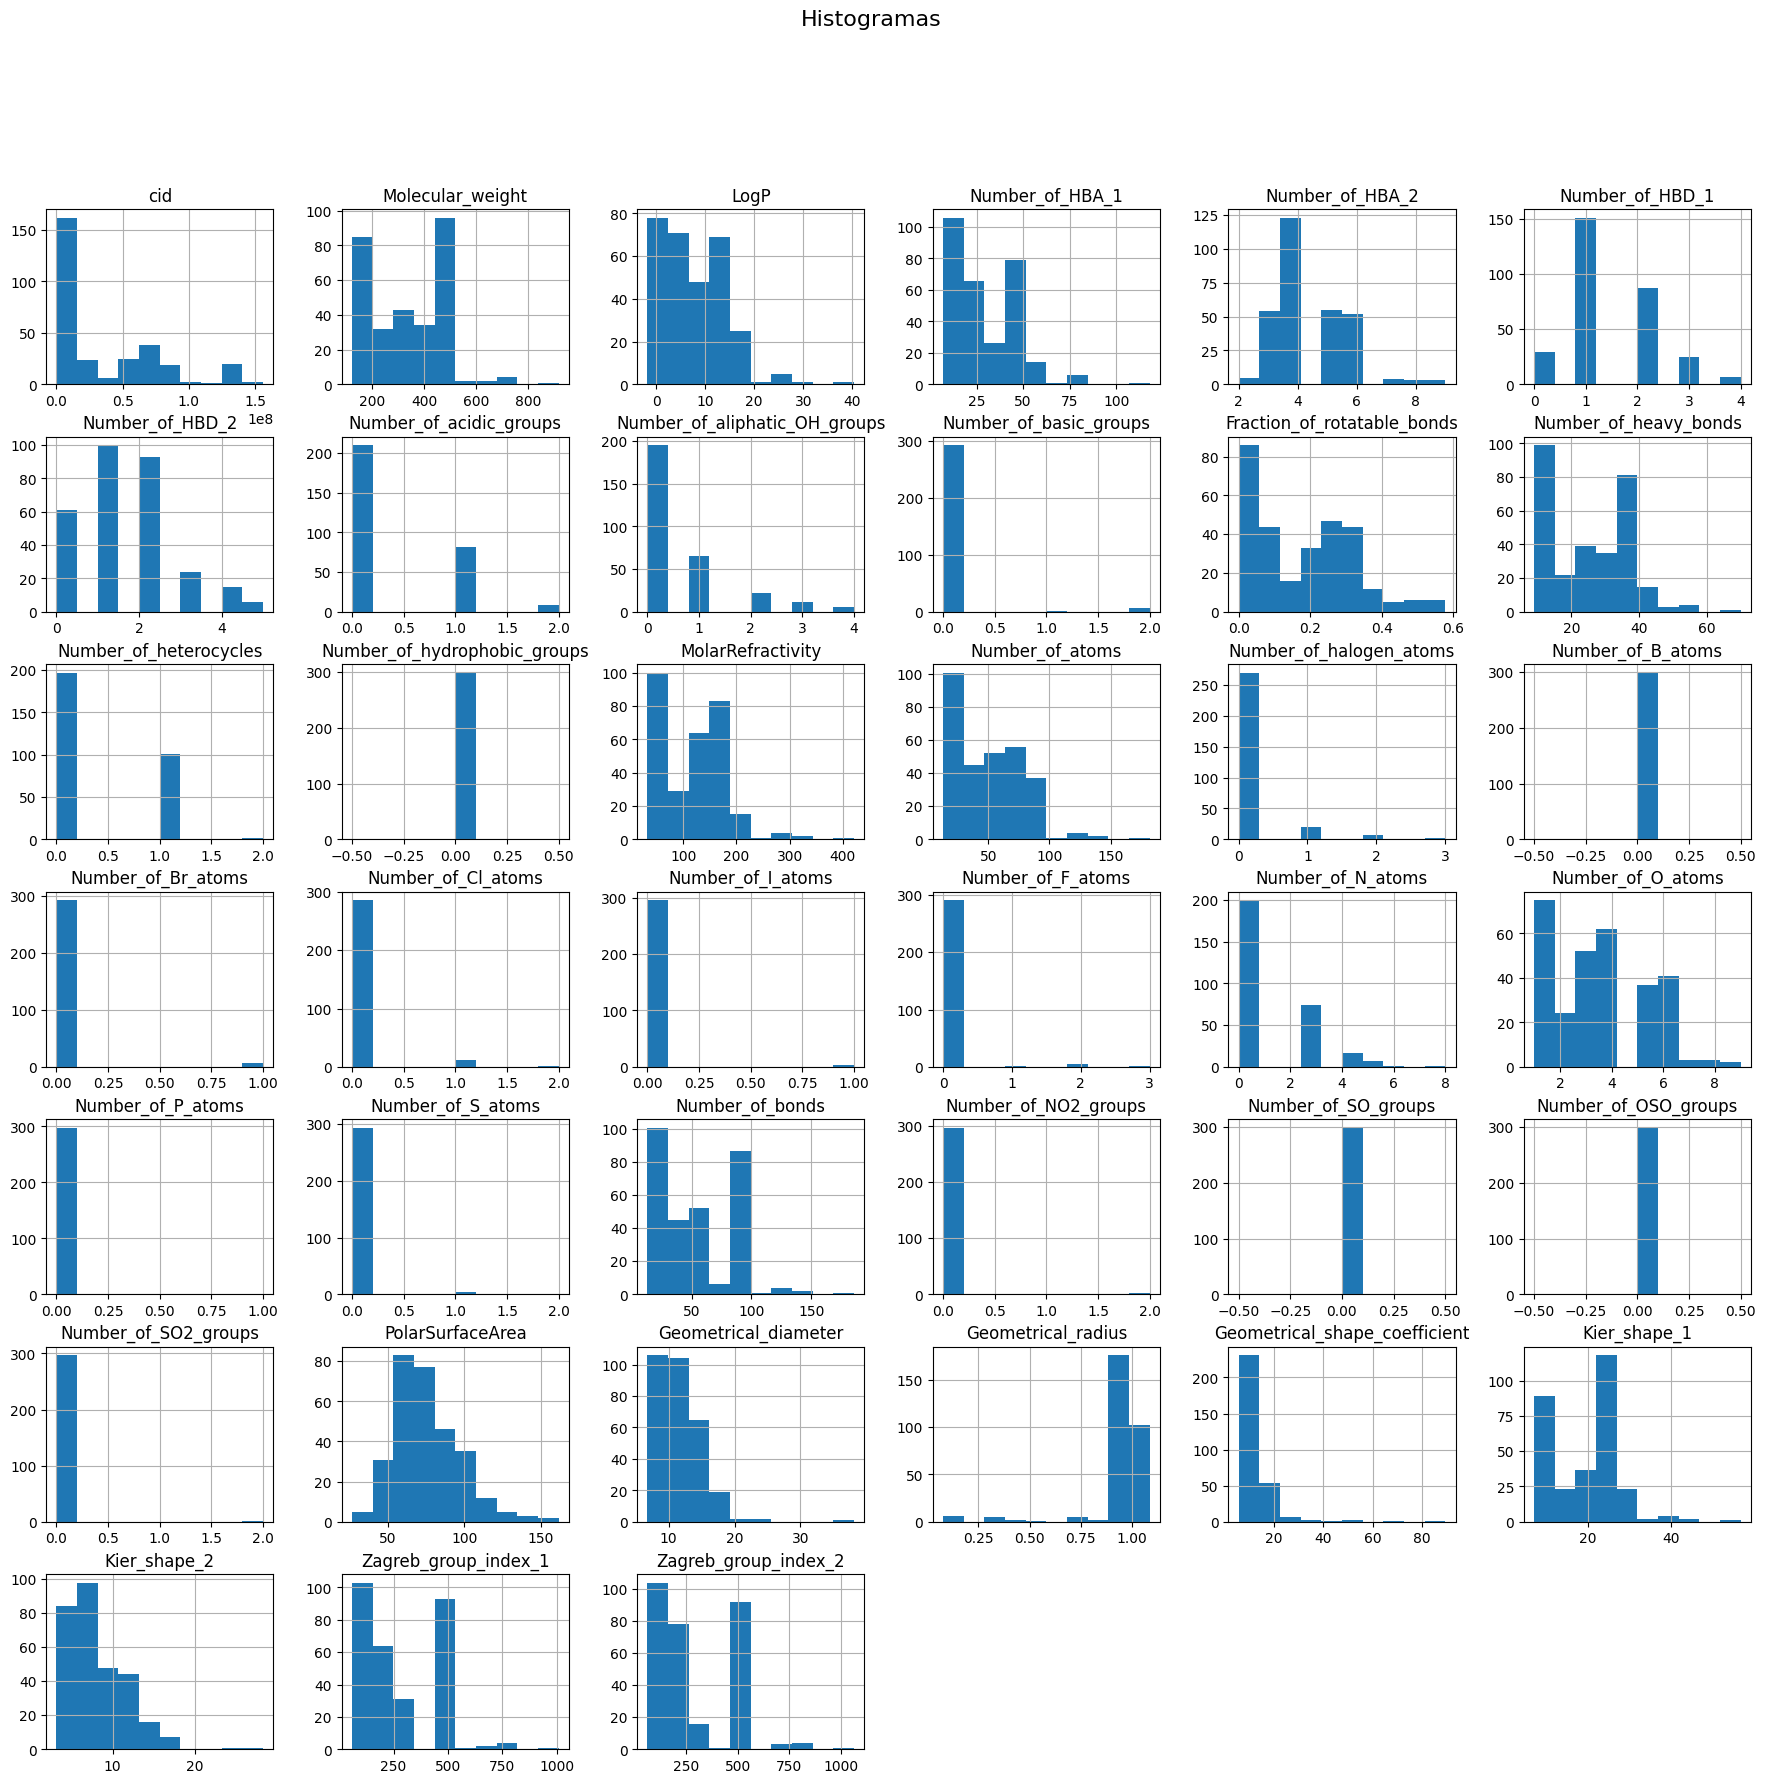

In [63]:
df.hist(figsize=(22, 20))
plt.suptitle('Histogramas', fontsize=16)
plt.show()

In [64]:
#Eliminamos clases que pueden perjudicar el modelo, Number_of_basic_groups, Number_of_hydrophobic_groups, Number_of_halogen_atoms
#, Number_of_B_atoms, Number_of_Br_atoms, Number_of_Cl_atoms, Number_of_I_atoms, Number_of_F_atoms, Number_of_P_atoms
# Number_of_P_atoms, Number_of_S_atoms, Number_of_NO2_atoms, Number_of_SO_atoms, Number_of_OSO_atoms, Number_of_SO2_atoms

clases_eliminar = ['Number_of_basic_groups', 'Number_of_hydrophobic_groups', 'Number_of_halogen_atoms', 'Number_of_B_atoms', 'Number_of_Br_atoms', 'Number_of_Cl_atoms', 'Number_of_I_atoms', 'Number_of_F_atoms', 'Number_of_P_atoms', 'Number_of_S_atoms', 'Number_of_NO2_groups', 'Number_of_SO_groups', 'Number_of_OSO_groups', 'Number_of_SO2_groups']
df = df.drop(clases_eliminar, axis=1)

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,299.0,3.591029e+07,4.070267e+07,1046.000000,5.281232e+06,1.388347e+07,6.895019e+07,1.560257e+08
Molecular_weight,299.0,3.351035e+02,1.431022e+02,122.115432,1.856230e+02,3.523860e+02,4.567110e+02,9.176300e+02
LogP,299.0,7.947166e+00,6.128274e+00,-1.765100,2.403450e+00,6.700400e+00,1.358675e+01,4.037570e+01
Number_of_HBA_1,299.0,3.017391e+01,1.828989e+01,7.000000,1.300000e+01,2.700000e+01,4.800000e+01,1.180000e+02
Number_of_HBA_2,299.0,4.448161e+00,1.209507e+00,2.000000,4.000000e+00,4.000000e+00,5.000000e+00,9.000000e+00
Number_of_HBD_1,299.0,1.431438e+00,8.657240e-01,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
Number_of_HBD_2,299.0,1.498328e+00,1.168302e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
Number_of_acidic_groups,299.0,3.244147e-01,5.230646e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Number_of_aliphatic_OH_groups,299.0,5.551839e-01,9.265645e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
Fraction_of_rotatable_bonds,299.0,1.837938e-01,1.350680e-01,0.000000,5.128205e-02,1.818182e-01,2.857143e-01,5.769231e-01


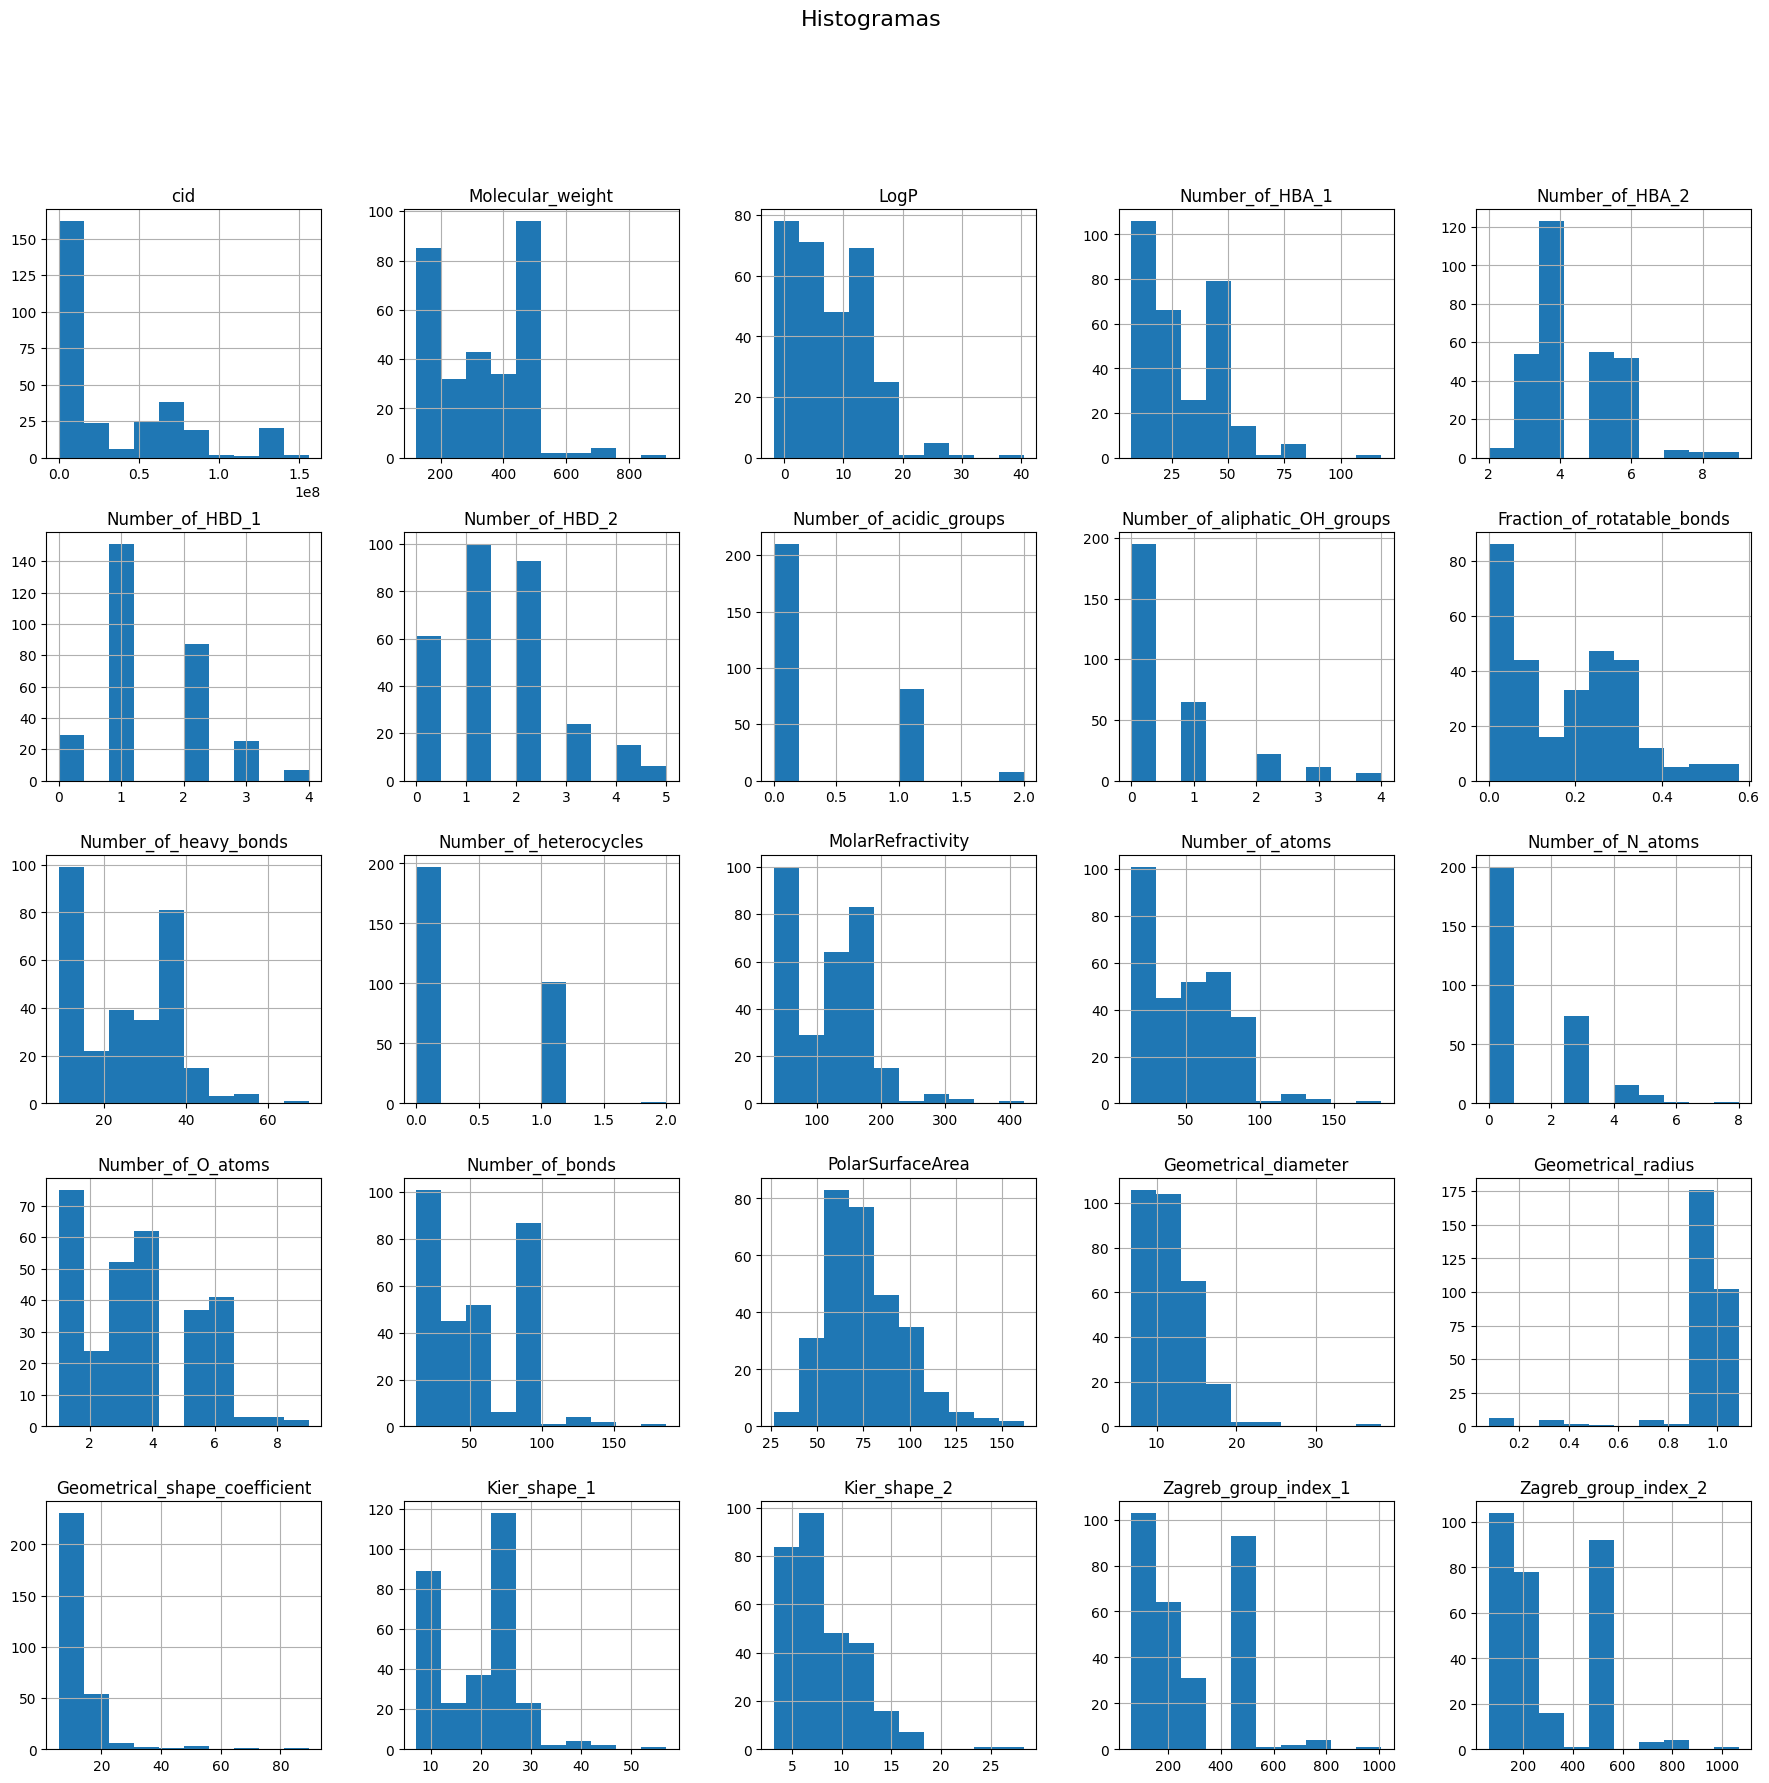

In [66]:

df.hist(figsize=(22, 20))
plt.suptitle('Histogramas', fontsize=16)
plt.show()

In [67]:
#eliminar outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calcula el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Define el factor de umbral
threshold = 1.5

# Identifica outliers
outliers = ((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)

# Filtra los datos para eliminar outliers
df = df[~outliers]

In [68]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,verbose=0,tol=1e-3,max_iter=600,n_init=20)

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


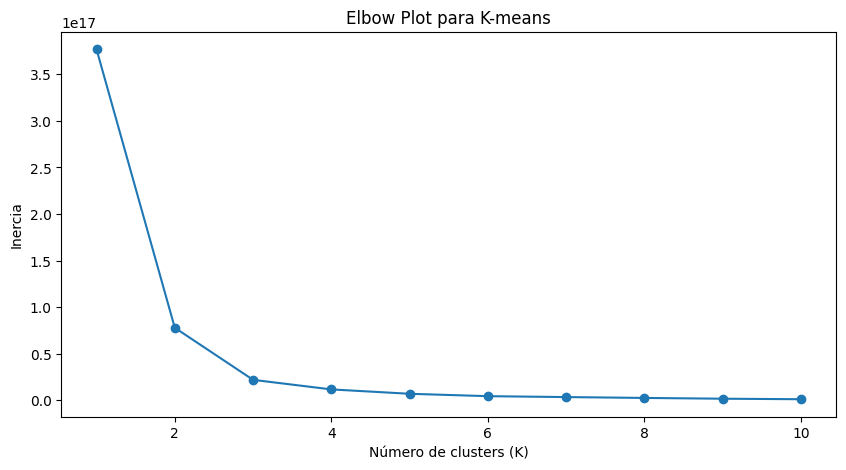

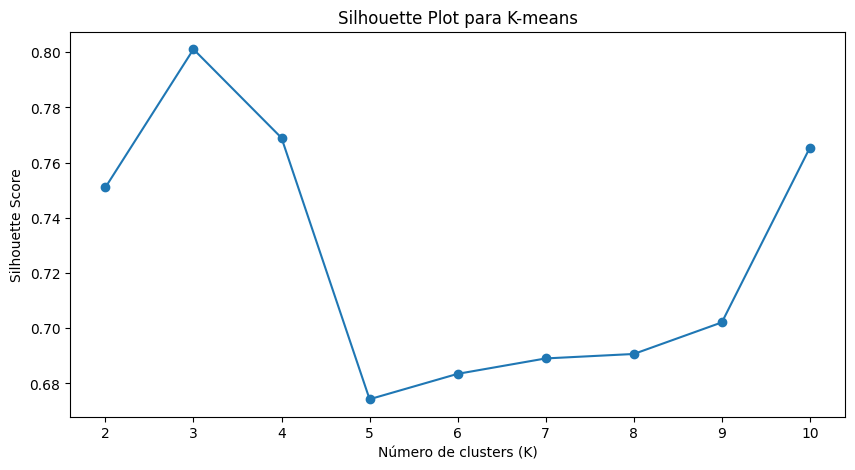

In [70]:
inercia = []
silhouette_scores = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,verbose=0,tol=1e-3,max_iter=300,n_init=20)
    kmeans.fit(df)

    inercia.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(df, kmeans.labels_)
        silhouette_scores.append(score)

# Visualizamos el Elbow plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inercia, marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.title('Elbow Plot para K-means')
plt.show()

# Visualizamos el Silhouette plot
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot para K-means')
plt.show()

In [71]:
#k = 3, por grafica se encuentra en el punto del codo de la primera grafica, y en la segunda coincide con el maximo valor

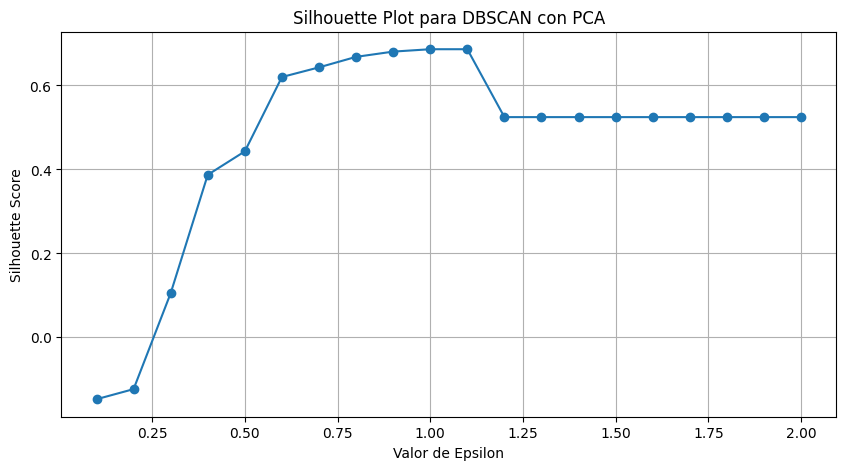

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Reducir la dimensionalidad utilizando PCA
pca = PCA(n_components=2)  # Reducir a 2 dimensiones para visualización
df_pca = pca.fit_transform(df_scaled)

# Entrenar el modelo DBSCAN con diferentes valores de epsilon
eps_values = np.linspace(0.1, 2.0, num=20)
silhouette_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(df_pca)
    # Verificar si hay más de un cluster asignado
    if len(set(dbscan.labels_)) > 1:
        # Calcular el silhouette score para cada valor de epsilon
        silhouette_scores.append(silhouette_score(df_pca, dbscan.labels_))
    else:
        silhouette_scores.append(0)  # Asignar un silhouette score de 0 si solo se encuentra un cluster

# Graficar el Silhouette plot para DBSCAN
plt.figure(figsize=(10, 5))
plt.plot(eps_values, silhouette_scores, marker='o')
plt.xlabel('Valor de Epsilon')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot para DBSCAN con PCA')
plt.grid(True)
plt.show()

In [73]:
#Un valor de epsilon adecuado sería de 0.65

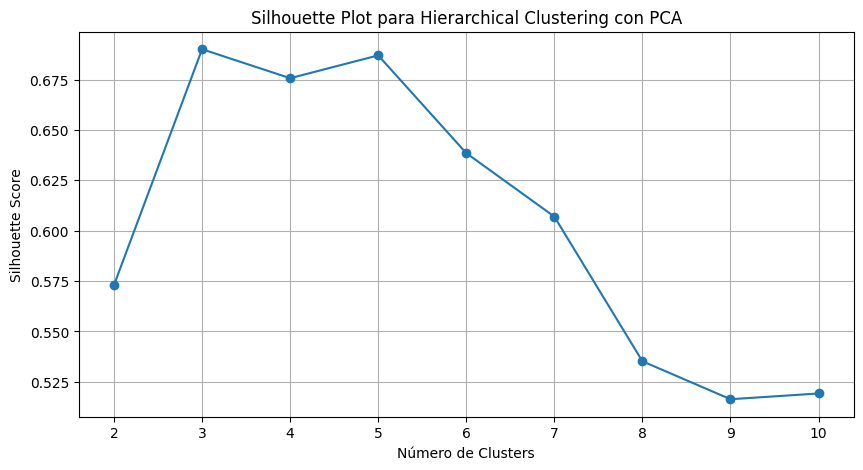

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Reducir la dimensionalidad utilizando PCA
pca = PCA(n_components=2)  # Reducir a 2 dimensiones para visualización
df_pca = pca.fit_transform(df_scaled)

# Entrenar el modelo de hierarchical clustering con diferentes números de clusters
n_clusters_range = range(2, 11)
silhouette_scores = []

for n_clusters in n_clusters_range:
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical.fit(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, hierarchical.labels_))

# Graficar el Silhouette plot para hierarchical clustering
plt.figure(figsize=(10, 5))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot para Hierarchical Clustering con PCA')
plt.grid(True)
plt.show()

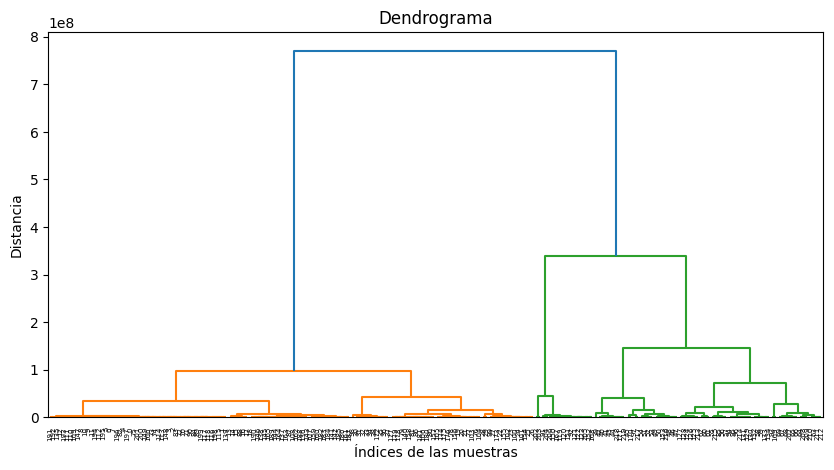

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)  # Reducir a 2 dimensiones para visualización
df_pca = pca.fit_transform(df)

n_clusters = 3
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical.fit(df_pca)

from scipy.cluster.hierarchy import linkage
Z = linkage(df_pca, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Índices de las muestras')
plt.ylabel('Distancia')
plt.show()


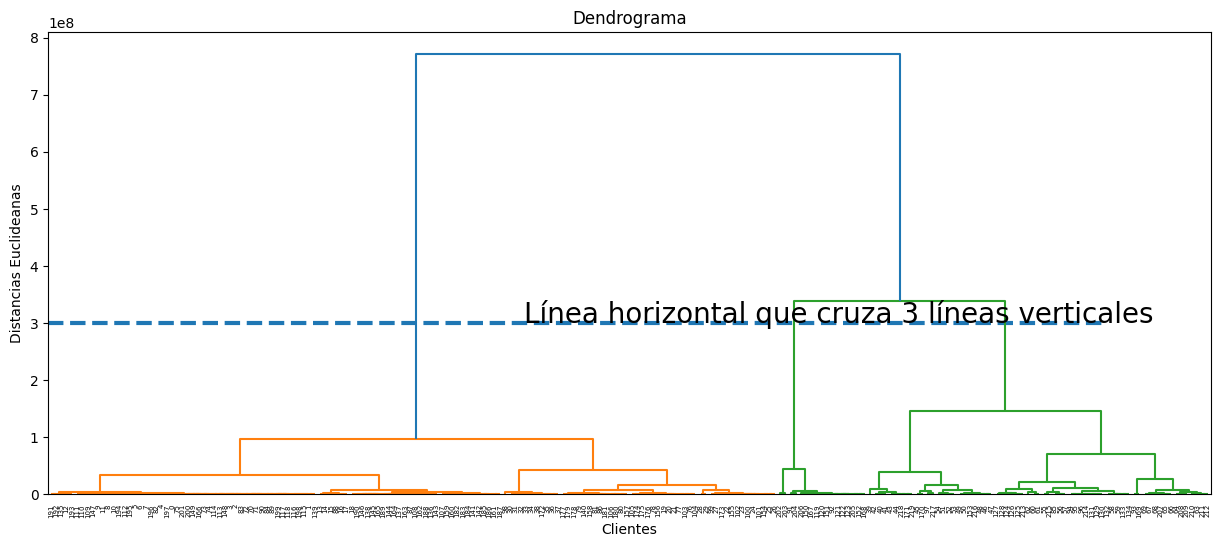

In [76]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias Euclideanas')
plt.hlines(y=3e8, xmin=0, xmax=2000, lw=3, linestyles='--')
plt.text(x=900, y=3e8, s='Línea horizontal que cruza 3 líneas verticales', fontsize=20)
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
plt.show()

In [77]:
df.reset_index(drop=True, inplace=True)
df


,cid,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Fraction_of_rotatable_bonds,...,Number_of_O_atoms,Number_of_bonds,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,1046,123.114998,1.0732,9,4,1,0,0,0,0.111111,...,1,14,68.87,7.031056,1.007808,5.976582,7.111111,3.239669,63,63
1,124704,165.155998,1.5166,13,6,2,0,0,0,0.166667,...,1,19,107.25,9.169663,1.003795,8.134998,10.083333,4.888889,85,84
2,171647,138.149998,1.2309,11,3,1,0,0,0,0.100000,...,1,18,59.86,7.067147,1.006808,6.019361,8.100000,3.408284,84,81
3,181450,157.559997,1.6036,8,4,1,0,0,0,0.100000,...,1,14,68.87,7.646398,1.007958,6.586025,8.100000,3.408284,64,66
4,258796,138.129998,1.1829,11,5,2,1,0,0,0.200000,...,1,16,80.90,7.137556,1.016733,6.020088,8.100000,4.000000,72,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,66738878,270.283993,4.1010,18,4,2,2,0,0,0.190476,...,4,35,66.76,12.465942,0.969726,11.855117,16.371882,7.852041,164,173
216,56597215,302.325993,5.2695,23,5,1,1,0,0,0.260870,...,5,41,72.83,11.524834,0.967956,10.906359,18.340265,8.740895,202,204
217,51136451,356.373991,5.9132,26,6,2,2,0,0,0.222222,...,6,47,93.06,11.376300,0.969437,10.734955,22.290809,9.972299,226,223
218,46946664,410.465990,8.5972,32,6,1,1,0,0,0.354839,...,6,57,82.06,16.457952,0.969098,15.982759,26.253902,14.210000,276,272


In [83]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Realiza clustering jerárquico aglomerativo
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df)

plt.figure(figsize=(12,7))
plt.scatter(df[y_hc == 0, 0], df[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(df[y_hc == 1, 0], df[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(df[y_hc == 2, 0], df[y_hc == 2, 1], s = 100, c = 'green', label = 'Target group')
plt.scatter(df[y_hc == 3, 0], df[y_hc == 3, 1], s = 100, c = 'orange', label = 'Careless')
plt.scatter(df[y_hc == 4, 0], df[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clustering of customers',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=16)
plt.ylabel('Spending Score (1-100)',fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.axhspan(ymin=60,ymax=100,xmin=0.4,xmax=0.96,alpha=0.3,color='yellow')
plt.show()

InvalidIndexError: (array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False]), 0)

<Figure size 1200x700 with 0 Axes>

In [82]:
len(y_hc)

220

In [79]:
y_hc

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 4, 4, 4, 0, 1, 4,
       4, 4, 4, 2, 2, 0, 0, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 3,
       1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 0, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3])

¿Cuántas dimensiones son requeridas para preservar el 95% de la varianza?



In [ ]:
from sklearn.decomposition import PCA
import numpy as np


pca = PCA()

pca.fit(df)

# Calcula la varianza explicada acumulativa
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Encuentra el número de componentes que preservan el 95% de la varianza
n_components_95_variance = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print("Dimensiones:", n_components_95_variance)

Se necesita 1 dimensión en el PCA